## Autoscout 24 - Projekt


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("autoscout24.csv", delimiter= ';')
df = pd.DataFrame(data)

print(df.shape)

(46405, 9)


In [3]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year of sale
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


### Vorbereitung

In [4]:
print("Null Werte pro Zeile:\n", df.isnull().sum())
print("\nEinzigartige Typen:\n", df.nunique())

Null Werte pro Zeile:
 mileage           0
make              0
model           143
fuel              0
gear            182
offerType         0
price             0
hp               29
year of sale      0
dtype: int64

Einzigartige Typen:
 mileage         20117
make               77
model             841
fuel               11
gear                3
offerType           5
price            6668
hp                328
year of sale       11
dtype: int64


In [5]:
# Null Werte entfernen
df.dropna(inplace= True)
print("Null Werte pro Zeile:\n", df.isnull().sum())

# Saubere Daten exportieren
df.to_csv("autoscout24_clean.csv", index= False)

Null Werte pro Zeile:
 mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price           0
hp              0
year of sale    0
dtype: int64


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       46071 non-null  int64  
 1   make          46071 non-null  object 
 2   model         46071 non-null  object 
 3   fuel          46071 non-null  object 
 4   gear          46071 non-null  object 
 5   offerType     46071 non-null  object 
 6   price         46071 non-null  int64  
 7   hp            46071 non-null  float64
 8   year of sale  46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


,mileage,price,hp,year of sale
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [7]:
df_num = pd.DataFrame(df[["mileage", "price", "hp", "year of sale"]])
print(df_num,"\n")
print(df_num.corr())

       mileage  price     hp  year of sale
0       235000   6800  116.0          2011
1        92800   6877  122.0          2011
2       149300   6900  160.0          2011
3        96200   6950  110.0          2011
4       156000   6950  156.0          2011
...        ...    ...    ...           ...
46400       99  12990   71.0          2021
46401       99  12990   71.0          2021
46402       99  12990   71.0          2021
46403       99  12990   71.0          2021
46404       99  12990   71.0          2021

[46071 rows x 4 columns] 

               mileage     price        hp  year of sale
mileage       1.000000 -0.303550 -0.014901     -0.678053
price        -0.303550  1.000000  0.746715      0.405698
hp           -0.014901  0.746715  1.000000      0.166900
year of sale -0.678053  0.405698  0.166900      1.000000


### Übersicht & Visualisierungen

In [8]:
import pandas_profiling as pp

# Erstelle einen Profilbericht
profile = pp.ProfileReport(df)

# Zeige den Bericht im Jupyter Notebook an
profile.to_notebook_iframe()

/var/folders/n4/2jsjjy910494c1ljpn5qdgt80000gn/T/ipykernel_78864/2905512391.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

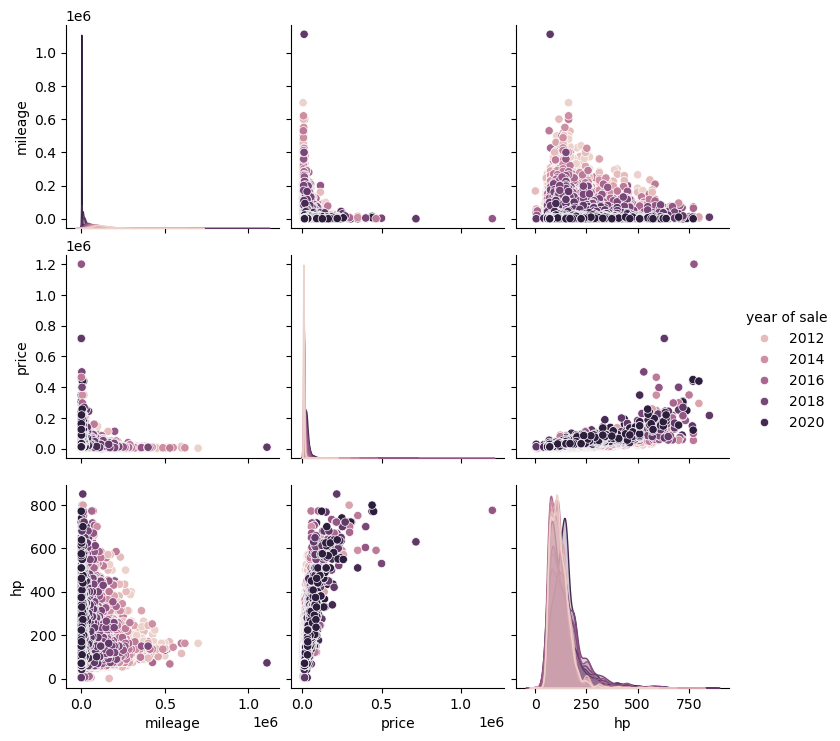

In [9]:
sns.pairplot(df_num, hue= "year of sale")

In [10]:
# Wie viele spalten haben eine 0 in price
print("Anzahl 0 Spalten in price:", df[df["price"] == 0].shape[0])
print("Das teuerste Auto\n", df[df["price"] == df["price"].max()])


Anzahl 0 Spalten in price: 0
Das teuerste Auto
        mileage     make model      fuel       gear offerType    price     hp  \
21675      431  Ferrari   F12  Gasoline  Automatic      Used  1199900  775.0   

       year of sale  
21675          2017  


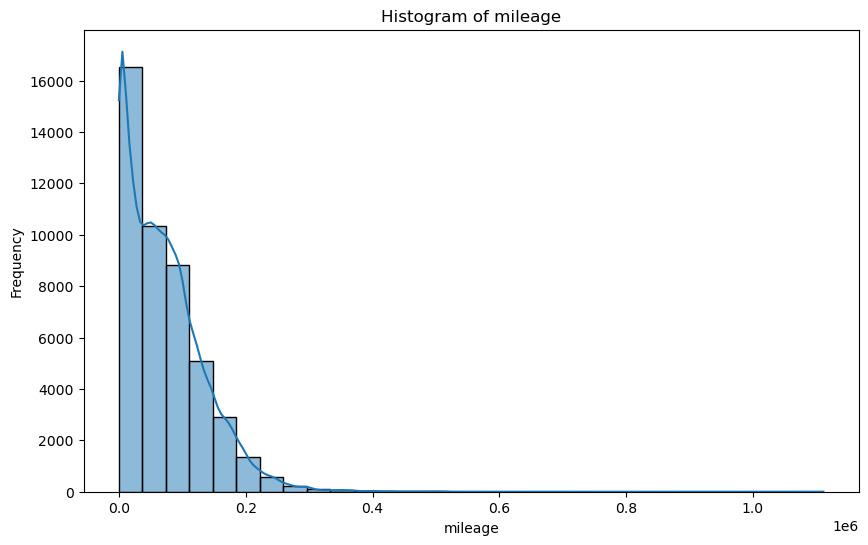

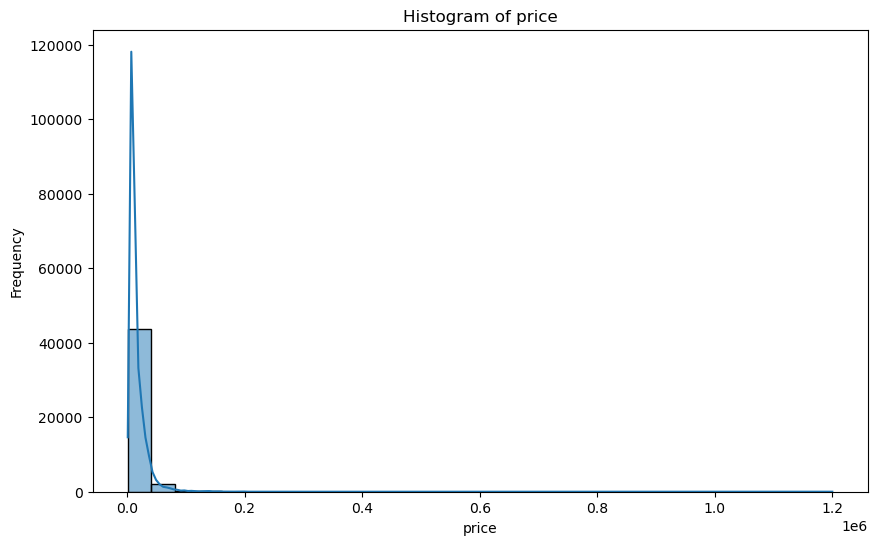

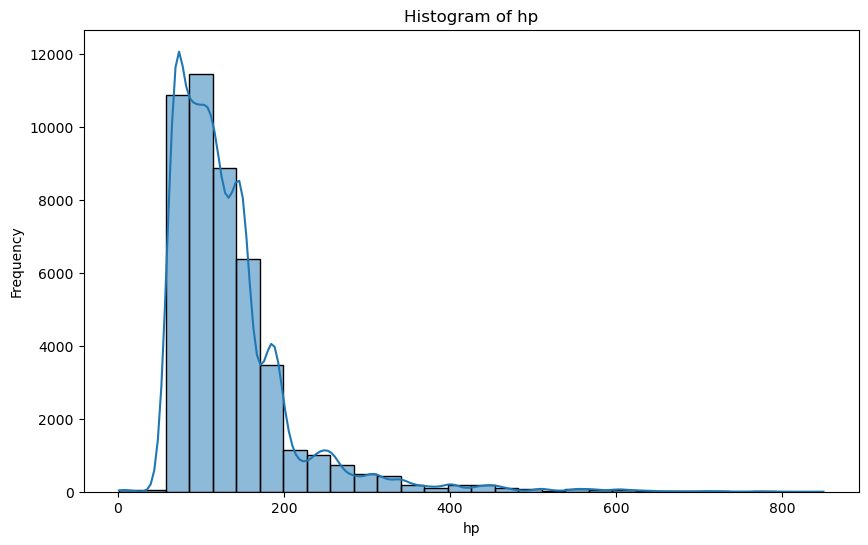

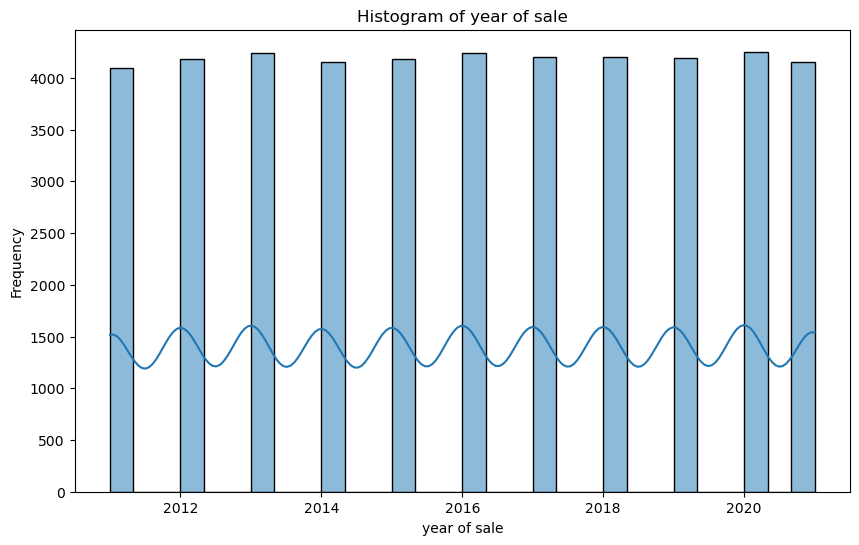

In [11]:

# Für jede Spalte in df_num ein Histogramm erstellen
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


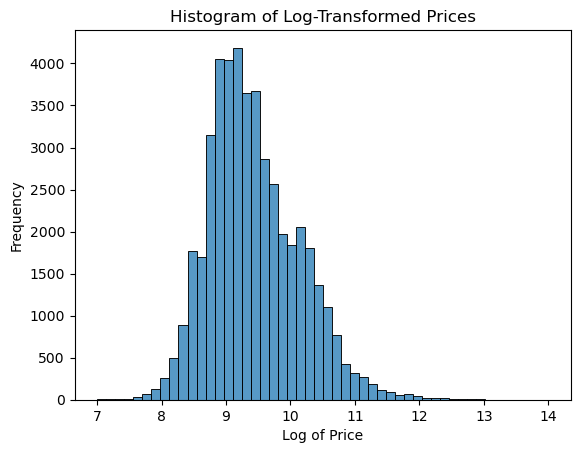

In [12]:
df['price_log'] = np.log1p(df['price'])  # +1 für den Fall, dass der Preis 0 ist
sns.histplot(df['price_log'], bins=50)
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Prices')
plt.show()

In [13]:
df.keys

<bound method NDFrame.keys of        mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered  

In [14]:
# Top 10 Hersteller nach Anzahl der Einträge bestimmen
top_10_names = df['make'].value_counts().nlargest(10).index
print(top_10_names)

# DataFrame filtern, um nur die Zeilen mit den Top 10 Herstellern zu behalten
top_10_df = df[df['make'].isin(top_10_names)]
print(top_10_df)

Index(['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault', 'Audi', 'BMW',
       'Mercedes-Benz', 'SEAT', 'Hyundai'],
      dtype='object', name='make')
       mileage        make    model      fuel       gear       offerType  \
0       235000         BMW      316    Diesel     Manual            Used   
1        92800  Volkswagen     Golf  Gasoline     Manual            Used   
2       149300        SEAT     Exeo  Gasoline     Manual            Used   
3        96200     Renault   Megane  Gasoline     Manual            Used   
6        91894     Renault   Scenic    Diesel     Manual            Used   
...        ...         ...      ...       ...        ...             ...   
46378      234        Audi       A3  Gasoline  Automatic  Employee's car   
46379     6000     Renault   Kadjar  Gasoline     Manual   Demonstration   
46381     4800  Volkswagen  T-Cross  Gasoline  Automatic   Demonstration   
46382        8        Audi       Q2  Gasoline  Automatic  Employee's car   
46399     150

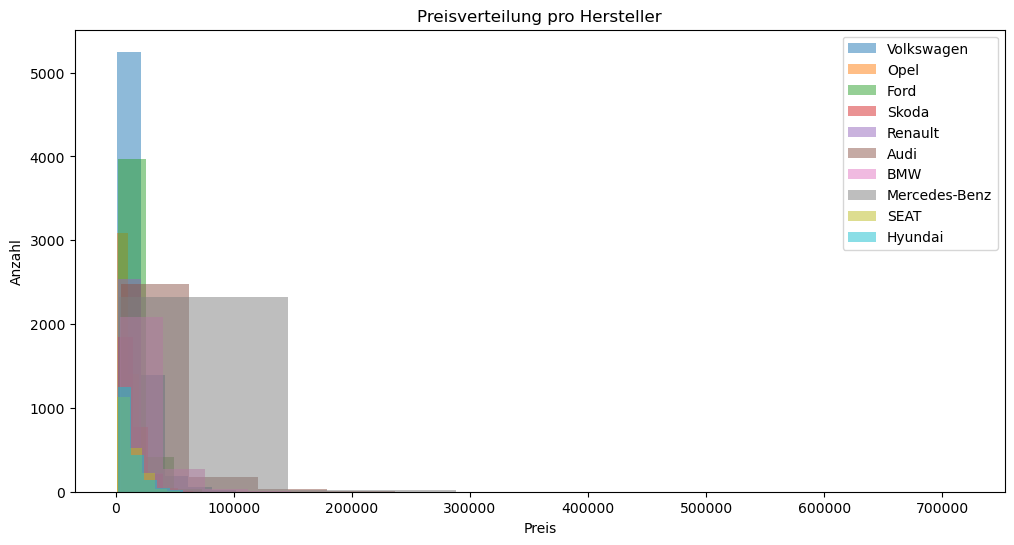

In [15]:
# Hersteller gruppieren und Histogramme erstellen
plt.figure(figsize=(12, 6))

for hersteller in top_10_names:
    plt.hist(top_10_df[top_10_df['make'] == hersteller]['price'], bins=5, alpha=0.5, label=hersteller)

plt.xlabel('Preis')
plt.ylabel('Anzahl')
plt.title('Preisverteilung pro Hersteller')
plt.legend()
plt.show()


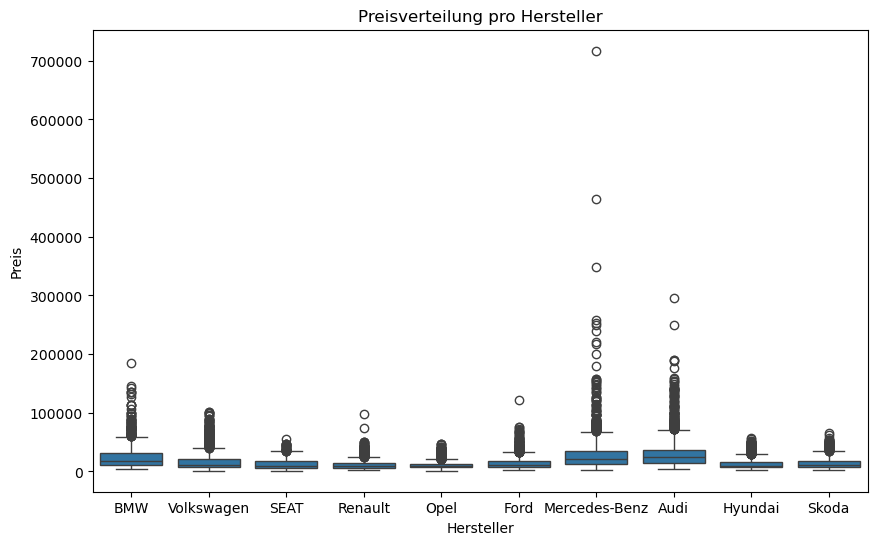

In [16]:
# Boxplot erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=top_10_df)
plt.xlabel('Hersteller')
plt.ylabel('Preis')
plt.title('Preisverteilung pro Hersteller')
plt.show()

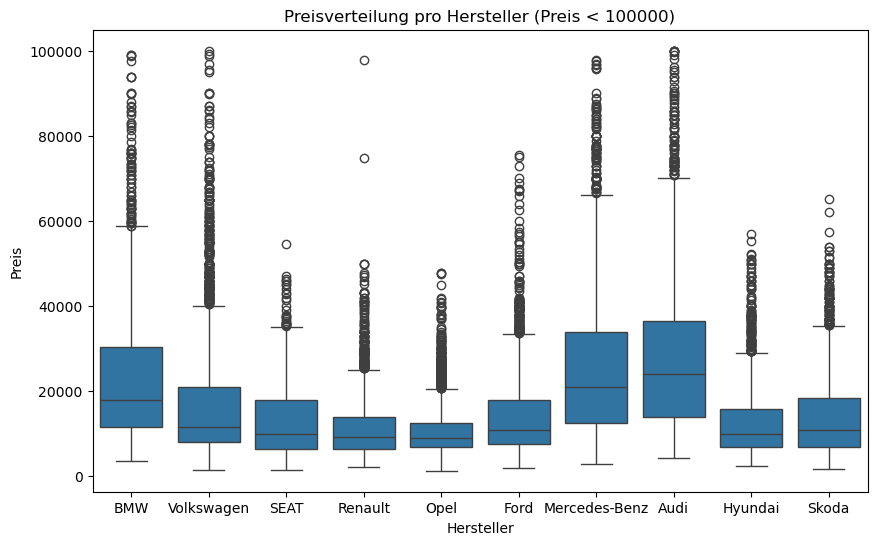

In [17]:
# Filtern der Daten auf Preis unter 100000
filtered_df = top_10_df[top_10_df['price'] < 100000]

# Boxplot erstellen mit den gefilterten Daten
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=filtered_df)
plt.xlabel('Hersteller')
plt.ylabel('Preis')
plt.title('Preisverteilung pro Hersteller (Preis < 100000)')
plt.show()

## DSI Aufgaben

    Analyse
       Wieviele Autos wurden verkauft? U ̈ber welchen Zeitraum?
     Welche Marken sind erfasst?
     Existieren Korrelationen zwischen den (numerischen) Features? (Scatterplots)
     Gibt es Ver ̈anderungen u ̈ber die Jahre?
     U ̈berlege dir weitere interessante Fragestellungen fu ̈r die gegebenen Daten.
    Machine Learning
        Die Autos welcher 5 Hersteller wurden am ha ̈ufigsten verkauft?
        Betrachte im folgenden nur noch Samples dieser 5 Hersteller.
        Wie teuer war durschnittlich ein Auto von Hersteller X?
        Trainiere ein Modell deiner Wahl (z.b. Lineare Regression) um ausgehend von
        
        Features deiner Wahl, den Verkaufspreis eines Autos vorherzusagen.
        
    - [ ] Welche Kategorie von Machine Learning ist dieses Problem?
    - [ ] Wie wird die Gu ̈te des Modells evaluiert? Was ist die Fehlermetrik?
    - [ ] Probiere noch andere Modelle aus

In [18]:
print("\nEinzigartige Typen:\n", df.nunique())


Einzigartige Typen:
 mileage         20020
make               71
model             835
fuel               11
gear                3
offerType           5
price            6640
hp                319
year of sale       11
price_log        6640
dtype: int64


Format (46071, 10)
Insgesamt Verkauft Autos 46071


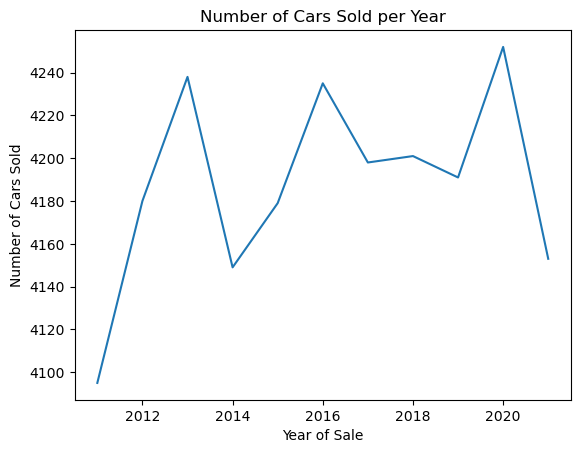

In [19]:
# Verkaufte Autos pro Jahr - Liniendiagram
print("Format", df.shape)
print("Insgesamt Verkauft Autos", df.shape[0])

# Anzahl der verkauften Autos pro Jahr berechnen
sales_per_year = df['year of sale'].value_counts().sort_index()

# DataFrame für das Liniendiagramm erstellen
sales_df = sales_per_year.reset_index()
sales_df.columns = ['year of sale', 'count']

# Liniendiagramm erstellen
sns.lineplot(data=sales_df, x='year of sale', y='count')
plt.xlabel('Year of Sale')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold per Year')
plt.show()


In [20]:
# Welche Marken sind erfasst?
# Häufigkeit der einzelnen Marken anzeigen
brand_counts = df["make"].value_counts()
print("Häufigkeit der Marken:\n", brand_counts)


Häufigkeit der Marken:
 make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
              ... 
Isuzu            1
Others           1
Zhidou           1
Brilliance       1
Alpine           1
Name: count, Length: 71, dtype: int64


<Axes: >

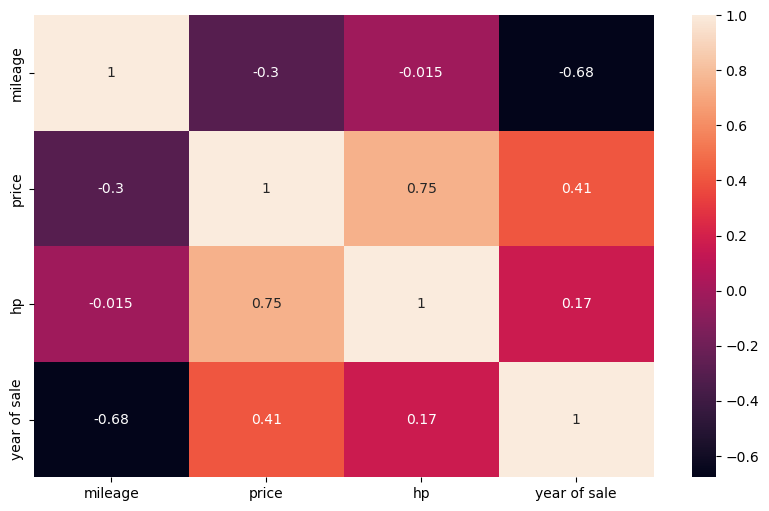

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot= True)

In [22]:
print("Die 5 Häufigst verkauften Autos sind:", brand_counts[:5])

Die 5 Häufigst verkauften Autos sind: make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
Name: count, dtype: int64


In [23]:
# Wie teuer war durschnittlich ein Auto von Hersteller X?
top_maker = ["Volkswagen", "Opel", "Ford", "Skoda", "Renault"]
for i in top_maker:
    print(f"Durchschnitte Preis von {i}:", round(df[df["make"] == i]["price"].mean(), 2),"$")


Durchschnitte Preis von Volkswagen: 16067.46 $
Durchschnitte Preis von Opel: 10422.39 $
Durchschnitte Preis von Ford: 13781.13 $
Durchschnitte Preis von Skoda: 13720.22 $
Durchschnitte Preis von Renault: 11335.89 $


In [24]:
# Liste der gewünschten Marken
top_maker = ["Volkswagen", "Opel", "Ford", "Skoda", "Renault"]

# DataFrame filtern nach den Marken in top_maker
df_filtered = df[df['make'].isin(top_maker)]

# Gefilterten DataFrame in eine CSV-Datei exportieren
# df_filtered.to_csv('top5_autos.csv', index=False)

# Optional: Gefilterten DataFrame anzeigen
print(df_filtered)


       mileage        make         model      fuel       gear       offerType  \
1        92800  Volkswagen          Golf  Gasoline     Manual            Used   
3        96200     Renault        Megane  Gasoline     Manual            Used   
6        91894     Renault        Scenic    Diesel     Manual            Used   
7       127500        Opel        Zafira  Gasoline     Manual            Used   
9          104        Ford       Transit    Diesel     Manual            Used   
...        ...         ...           ...       ...        ...             ...   
46376     5000     Renault  Grand Scenic  Gasoline     Manual   Demonstration   
46377      100  Volkswagen          Golf    Diesel  Automatic  Pre-registered   
46379     6000     Renault        Kadjar  Gasoline     Manual   Demonstration   
46381     4800  Volkswagen       T-Cross  Gasoline  Automatic   Demonstration   
46399     1500       Skoda         Fabia  Gasoline     Manual   Demonstration   

       price     hp  year o

## Machine Learning

In [25]:
# Ergebnisse sammeln, Spaltennamen korrigieren (ohne Dopplung)
results = pd.DataFrame({
    "ML Model Name": [],
    "Mean Absolute Error (MAE)": [],
    "Mean Squared Error (MSE)": [],
    "Root Mean Squared Error (RMSE)": [],
    "R²-Score": []
})

# Funktion zum Hinzufügen von Ergebnissen in den DataFrame
def add_results(model_name, y_true, y_pred, df):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Neue Zeile hinzufügen
    new_row = pd.DataFrame({
        "ML Model Name": [model_name],
        "Mean Absolute Error (MAE)": [mae],
        "Mean Squared Error (MSE)": [mse],
        "Root Mean Squared Error (RMSE)": [rmse],
        "R²-Score": [r2]
    })
    
    return pd.concat([df, new_row], ignore_index=True)

# Ergebnisse anzeigen
print(results)


Empty DataFrame
Columns: [ML Model Name, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R²-Score]
Index: []


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df_num.drop("price", axis= 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 42)

lr = LinearRegression().fit(X_train, y_train)

prediction = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("Linear Regression", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 4557.929
Mean Squared Error (MSE): 97948417.233
Root Mean Squared Error (MSE): 9896.889
R²-Score: 0.6870562118912058

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


<Figure size 1600x800 with 0 Axes>

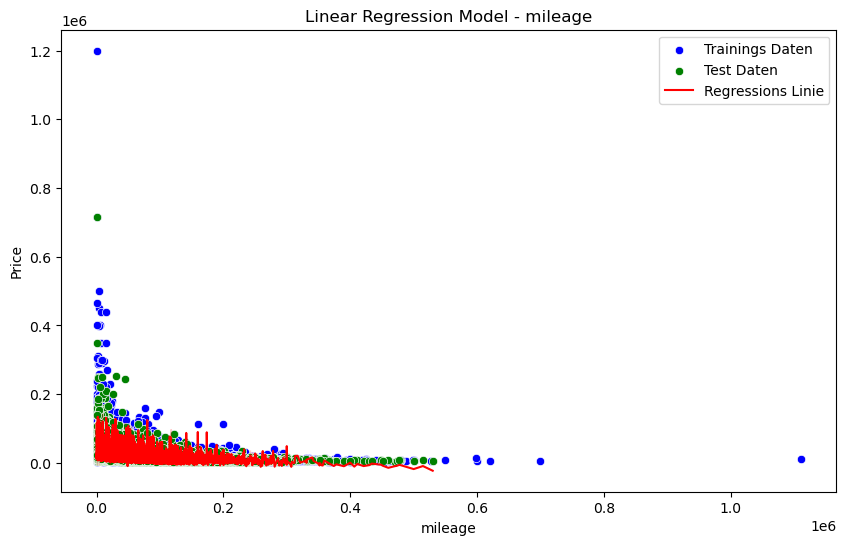

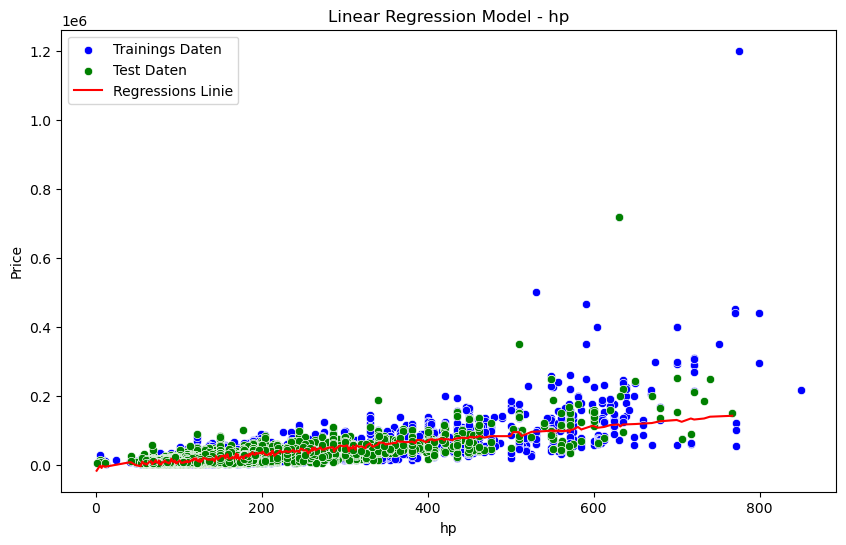

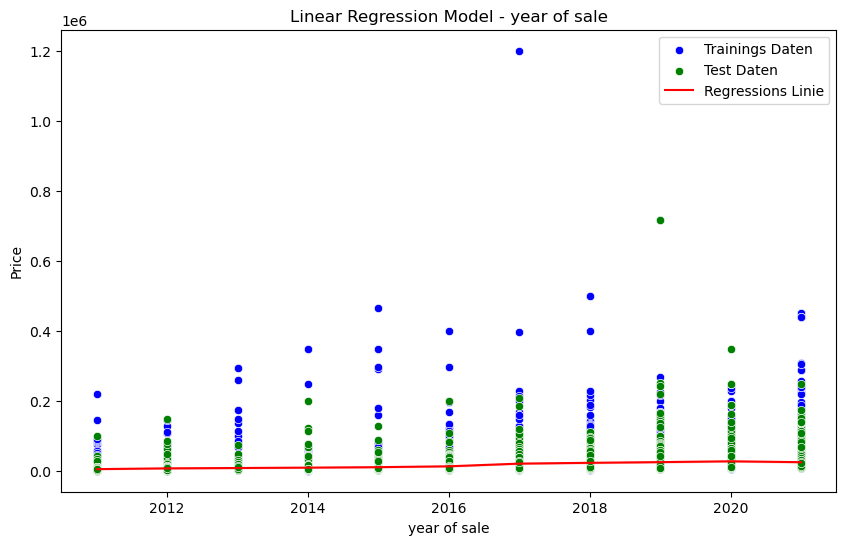

In [27]:
# Erstelle eine Liste der Features, die visualisiert werden sollen
features = ["mileage", "hp", "year of sale"]

plt.figure(figsize=(16, 8))

# Erstelle einen Scatterplot für jedes Feature
for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatterplot für Trainingsdaten
    sns.scatterplot(x=X_train[feature], y=y_train, color="blue", label="Trainings Daten")
    
    # Scatterplot für Testdaten
    sns.scatterplot(x=X_test[feature], y=y_test, color="green", label="Test Daten")
    
    # Regressionslinie
    sns.lineplot(x=X_test[feature], y=prediction, color="red", label="Regressions Linie")

    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Linear Regression Model - {feature}")
    plt.legend()
    plt.show()

In [28]:
df.keys()

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year of sale', 'price_log'],
      dtype='object')

## Preis Vorhersage

In [29]:
# Mehrere neue Autodaten für Vorhersagen
neue_autos = pd.DataFrame({
    'mileage'       : [50000, 120000, 30000],  # Beispielwerte
    'hp'            : [100, 300, 600],
    'year of sale'  : [2018, 2015, 2020]           
})

# Vorhersagen für die Autos
vorhergesagte_preise = lr.predict(neue_autos)

# Ergebnisse anzeigen
for i, preis in enumerate(vorhergesagte_preise):
    print(f"Vorhergesagter Preis für Auto {i+1}: {preis:.2f} €")

Vorhergesagter Preis für Auto 1: 13566.99 €
Vorhergesagter Preis für Auto 2: 44075.75 €
Vorhergesagter Preis für Auto 3: 110258.15 €


## Weitere Modelle

Data Frame zum sammeln der Ergebnisse

In [30]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("DecisionTreeRegressor", y_test, prediction, results)

print("The model performance test: DecisionTreeRegressor")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test: DecisionTreeRegressor
--------------------------------------
Mean Absolute Error (MSE): 3459.981
Mean Squared Error (MSE): 71950779.701
Root Mean Squared Error (MSE): 8482.381
R²-Score: 0.7701182909007889

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("RandomForestRegressor", y_test, prediction, results)

print("The model performance test: RandomForestRegressor")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test: RandomForestRegressor
--------------------------------------
Mean Absolute Error (MSE): 2945.051
Mean Squared Error (MSE): 56204879.647
Root Mean Squared Error (MSE): 7496.991
R²-Score: 0.8204262157178086

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("GradientBoostingRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 3083.087
Mean Squared Error (MSE): 60705067.587
Root Mean Squared Error (MSE): 7791.346
R²-Score: 0.8060481797988458

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
#

# Data scaling: Train-Test-Split annehmen
scaler_X = StandardScaler() 
scaler_y = StandardScaler()

# Fit und Transform auf X_train anwenden
X_train_scaled = scaler_X.fit_transform(X_train)

# Testdaten nur transformieren
X_test_scaled = scaler_X.transform(X_test)

# Zielvariable skalieren
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Modell erstellen und trainieren
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)

# Vorhersagen generieren
y_pred_scaled = model.predict(X_test_scaled)

# Zurückskalieren der Vorhersagen für die Metriken
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Performanzmetriken berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Ergebnisse speichern (falls add_results-Funktion vorhanden ist)
results = add_results("SVR", y_test, y_pred, results)

# Ergebnisse ausgeben
print("The model performance on the test set")
print("--------------------------------------")
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print(f"R²-Score: {r2:.3f}")
print("\nInterpretation der Ergebnisse:")
print("Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance on the test set
--------------------------------------
Mean Absolute Error (MAE): 3025.741
Mean Squared Error (MSE): 68949656.463
Root Mean Squared Error (RMSE): 8303.593
R²-Score: 0.780

Interpretation der Ergebnisse:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [34]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("MLPRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 3876.558
Mean Squared Error (MSE): 78664282.67
Root Mean Squared Error (MSE): 8869.289
R²-Score: 0.7486687452113503

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [35]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("XGBRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")


The model performance test
--------------------------------------
Mean Absolute Error (MSE): 2933.586
Mean Squared Error (MSE): 81486829.048
Root Mean Squared Error (MSE): 9027.006
R²-Score: 0.739650750021031

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


# Ergebnisse im Überblick

In [36]:
results 

,ML Model Name,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R²-Score
0,Linear Regression,4557.929404,9.794842e+07,9896.889271,0.687056
1,DecisionTreeRegressor,3459.981280,7.195078e+07,8482.380544,0.770118
2,RandomForestRegressor,2945.050969,5.620488e+07,7496.991373,0.820426
3,GradientBoostingRegressor,3083.087461,6.070507e+07,7791.345685,0.806048
4,SVR,3025.741136,6.894966e+07,8303.592985,0.779707
5,MLPRegressor,3876.557979,7.866428e+07,8869.288735,0.748669
6,XGBRegressor,2933.586330,8.148683e+07,9027.005542,0.739651


In [37]:
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")
print("\nRandomForestRegressor schneidet ganz gut ab. Man könnte als nächsten Schritt eine Hyperparameter-Optimierung durchführen.")


 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.

RandomForestRegressor schneidet ganz gut ab. Man könnte als nächsten Schritt eine Hyperparameter-Optimierung durchführen.




Hinweis: Das beste Model wird jeweils grün angezeigt.


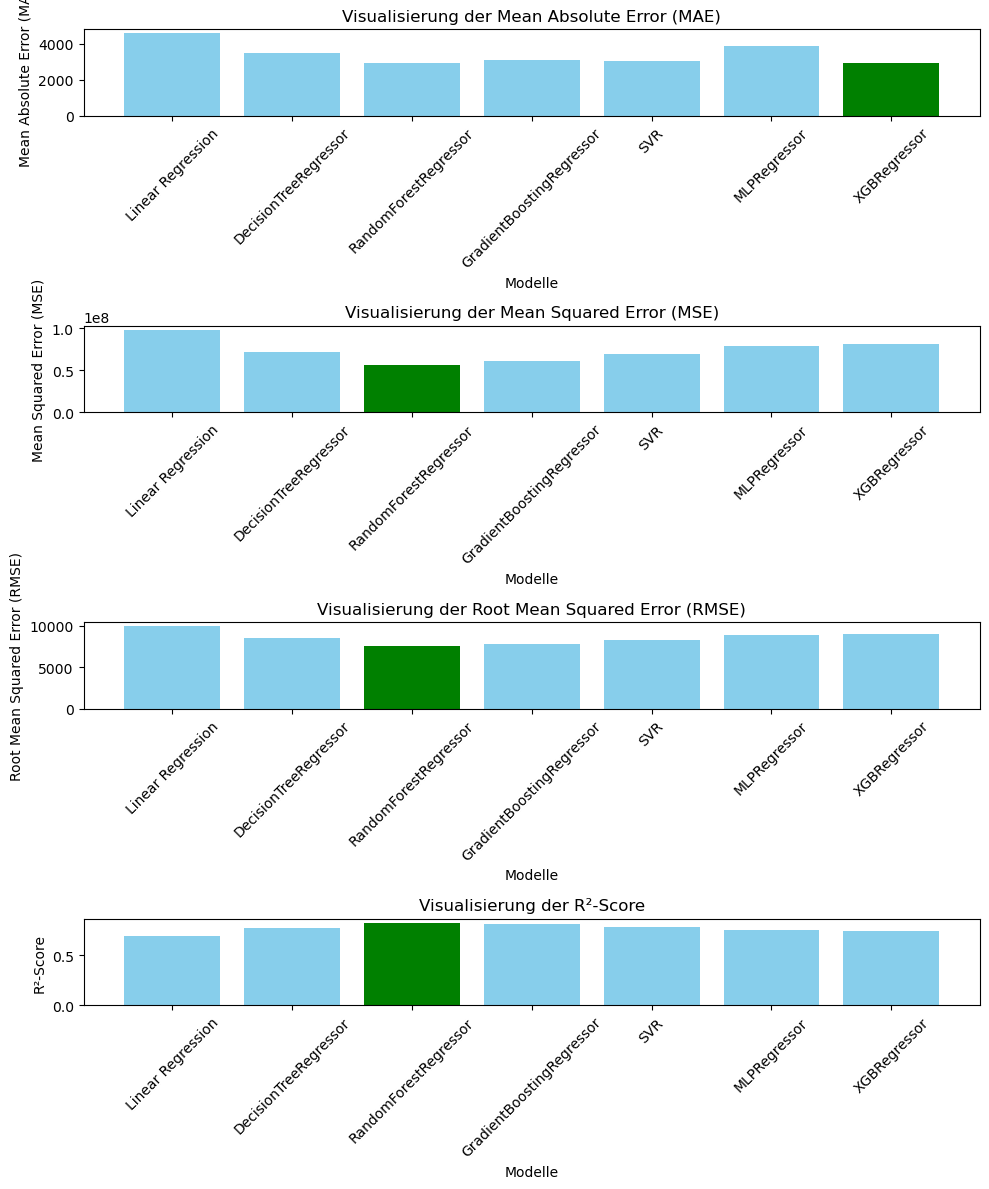

In [38]:
# Modellnamen und deren Metric
print("\n\nHinweis: Das beste Model wird jeweils grün angezeigt.")

metrics = ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R²-Score"]
n_metrics = len(metrics)

plt.figure(figsize=(10, 12))  # Die Größe des Plots anpassen

for i, metric in enumerate(metrics):
    plt.subplot(n_metrics, 1, i + 1)  # Vertikale Anordnung
    # Bestimme den Index des minimalen Wertes
    min_value_index = results[metric].idxmin()
    
    # Färbe die Balken entsprechend
    bar_colors = ['skyblue' for _ in range(len(results))]  # Standardfarbe

    if metric != "R²-Score":
        bar_colors[min_value_index] = 'green'  # Grüne Farbe für den minimalen Wert

    # Bei R²-Score: Bestimme den Index des maximalen Wertes
    if metric == "R²-Score":
        max_value_index = results[metric].idxmax()
        bar_colors[max_value_index] = 'green'  # Grüne Farbe für den maximalen Wert

    plt.bar(results["ML Model Name"], results[metric], color=bar_colors)
    plt.xlabel('Modelle')
    plt.ylabel(metric)
    plt.title(f'Visualisierung der {metric}')
    plt.xticks(rotation=45)

plt.tight_layout()  # verbessert das Layout
plt.show()

### Daten Exportieren

In [46]:
# DataFrame als CSV-Datei exportieren
results.to_csv('ML_results.csv', index=False)

In [41]:
df["hp"].nlargest(20)

43126    850.0
18419    799.0
24389    799.0
21675    775.0
20998    772.0
40404    772.0
45694    771.0
7383     770.0
7384     770.0
43140    767.0
23326    751.0
30672    740.0
14269    733.0
7381     721.0
7382     721.0
18418    721.0
19249    721.0
40770    721.0
40771    721.0
43128    721.0
Name: hp, dtype: float64

## RandomForestRegressor Hyperparameteroptimierung

In [42]:
from sklearn.model_selection import GridSearchCV

# Random Forest Modell initialisieren
rf = RandomForestRegressor(random_state=42)

# Parameter-Gitter definieren
param_grid = {
    'n_estimators': np.arange(10, 201, 10),  # Anzahl der Bäume
    'max_features': ['sqrt', 1.0],           # Anzahl der Merkmale, die bei der Split-Auswahl berücksichtigt werden
    'max_depth': [None] + list(np.arange(5, 21, 5)),  # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],         # Minimale Anzahl an Samples, um einen Knoten zu splitten
    'min_samples_leaf': [1, 2, 4],           # Minimale Anzahl an Samples in einem Blatt
}

# GridSearchCV instanziieren mit weniger Folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Grid Search durchführen
grid_search.fit(X_train, y_train)

# Beste Hyperparameter und Punktzahl ausgeben
print("Beste Anzahl an Bäumen:", grid_search.best_params_['n_estimators'])
print("Beste max_features:", grid_search.best_params_['max_features'])
print("Beste max_depth:", grid_search.best_params_['max_depth'])
print("Beste min_samples_split:", grid_search.best_params_['min_samples_split'])
print("Beste min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
print("Beste Punktzahl (negatives MSE):", grid_search.best_score_)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
Beste Anzahl an Bäumen: 30
Beste max_features: 1.0
Beste max_depth: 15
Beste min_samples_split: 2
Beste min_samples_leaf: 4
Beste Punktzahl (negatives MSE): -77834548.44645055


In [43]:
# Mache Vorhersagen und berechne den MSE für das Testset
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("RandomForestRegressor *", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 2933.586
Mean Squared Error (MSE): 81486829.048
Root Mean Squared Error (MSE): 9027.006
R²-Score: 0.739650750021031

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [44]:
results 

,ML Model Name,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R²-Score
0,Linear Regression,4557.929404,9.794842e+07,9896.889271,0.687056
1,DecisionTreeRegressor,3459.981280,7.195078e+07,8482.380544,0.770118
2,RandomForestRegressor,2945.050969,5.620488e+07,7496.991373,0.820426
3,GradientBoostingRegressor,3083.087461,6.070507e+07,7791.345685,0.806048
4,SVR,3025.741136,6.894966e+07,8303.592985,0.779707
5,MLPRegressor,3876.557979,7.866428e+07,8869.288735,0.748669
6,XGBRegressor,2933.586330,8.148683e+07,9027.005542,0.739651
7,RandomForestRegressor *,2933.586330,8.148683e+07,9027.005542,0.739651




Hinweis: Das beste Model wird jeweils grün angezeigt.


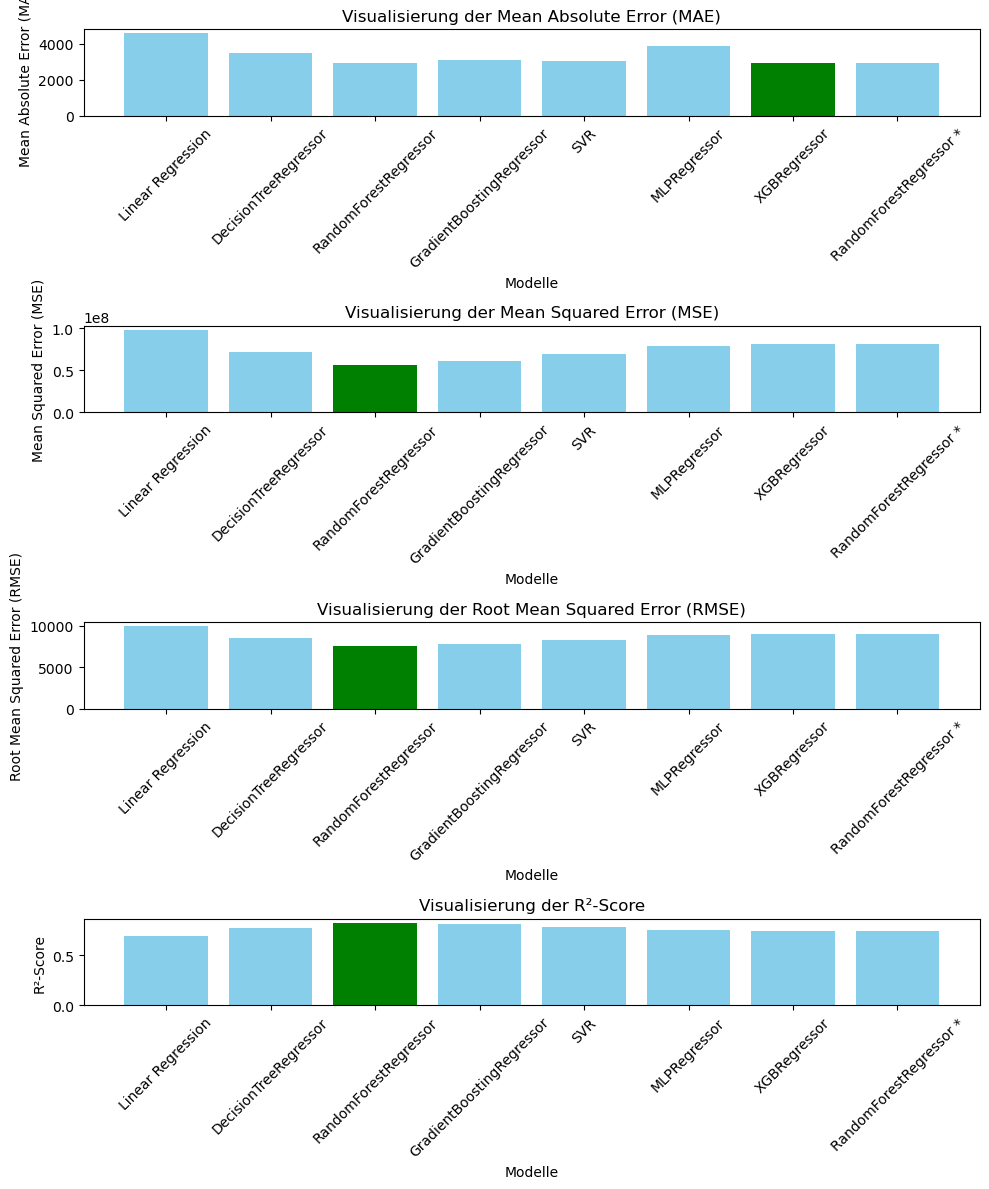

In [45]:
# Modellnamen und deren Metric
print("\n\nHinweis: Das beste Model wird jeweils grün angezeigt.")

metrics = ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R²-Score"]
n_metrics = len(metrics)

plt.figure(figsize=(10, 12))  # Die Größe des Plots anpassen

for i, metric in enumerate(metrics):
    plt.subplot(n_metrics, 1, i + 1)  # Vertikale Anordnung
    # Bestimme den Index des minimalen Wertes
    min_value_index = results[metric].idxmin()
    
    # Färbe die Balken entsprechend
    bar_colors = ['skyblue' for _ in range(len(results))]  # Standardfarbe

    if metric != "R²-Score":
        bar_colors[min_value_index] = 'green'  # Grüne Farbe für den minimalen Wert

    # Bei R²-Score: Bestimme den Index des maximalen Wertes
    if metric == "R²-Score":
        max_value_index = results[metric].idxmax()
        bar_colors[max_value_index] = 'green'  # Grüne Farbe für den maximalen Wert

    plt.bar(results["ML Model Name"], results[metric], color=bar_colors)
    plt.xlabel('Modelle')
    plt.ylabel(metric)
    plt.title(f'Visualisierung der {metric}')
    plt.xticks(rotation=45)

plt.tight_layout()  # verbessert das Layout
plt.show()